In [1]:
!pip install matplotlib scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


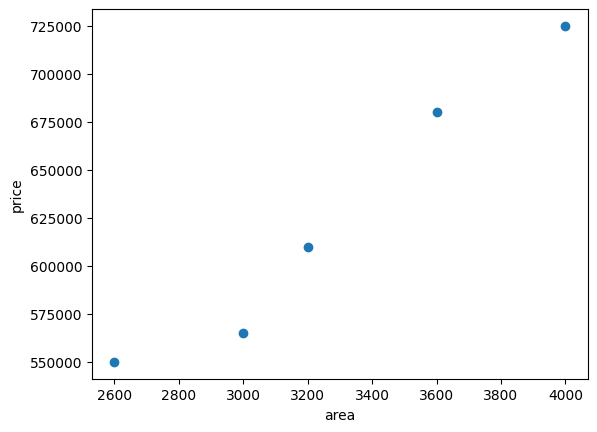

In [19]:
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price)
plt.show()

In [51]:
new_df = df.drop("price", axis="columns")
price = df.price
print(new_df, new_df.values, type(new_df), type(df.area), type(price))

   area
0  2600
1  3000
2  3200
3  3600
4  4000 [[2600]
 [3000]
 [3200]
 [3600]
 [4000]] <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [59]:
#Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df.values, price)

LinearRegression()

In [61]:
reg.predict([[3300]])

array([628715.75342466])

In [63]:
reg.coef_

array([135.78767123])

In [65]:
reg.intercept_

np.float64(180616.43835616432)

In [67]:
3300*135.78767123+180616.43835616432

628715.7534151643

In [69]:
reg.predict([[5000]])

array([859554.79452055])

In [79]:
areas_df = pd.read_csv("data/homeprices-areas.csv")
areas_df, areas_df.head(3)

(    area
 0   1000
 1   1500
 2   2300
 3   3540
 4   4120
 5   4560
 6   5490
 7   3460
 8   4750
 9   2300
 10  9000
 11  8600
 12  7100,
    area
 0  1000
 1  1500
 2  2300)

In [85]:
reg2 = reg.predict(areas_df.values)
reg2

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [87]:
areas_df["prices"] = reg2
areas_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [89]:
areas_df.to_csv("data/homeprices-areas-prediction.csv")

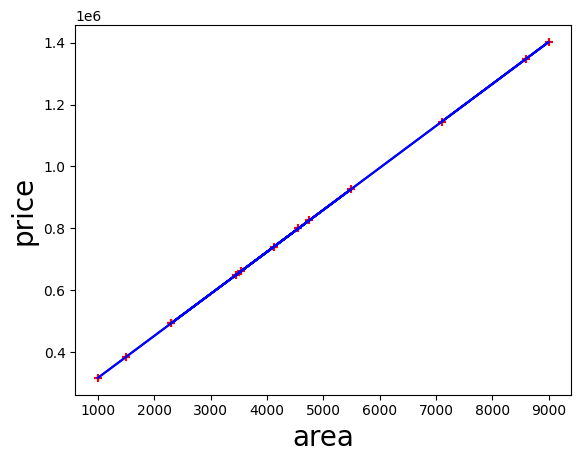

In [124]:
plt.xlabel("area", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.scatter(areas_df.area, areas_df.prices, color="red", marker="+")
plt.plot(areas_df.area, reg.predict(areas_df[["area"]].values), color="blue")
plt.show()